In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(10)
y = x*2

In [3]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
y

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

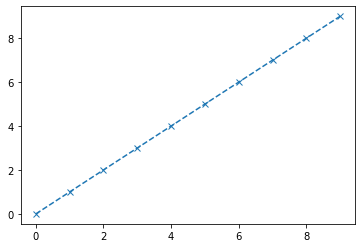

In [9]:
plt.plot(x, "x--")

#Pandas

In [10]:
from google.colab import files
uploaded = files.upload()

Saving Bank_churn_modelling.csv to Bank_churn_modelling.csv


In [11]:
!ls

Bank_churn_modelling.csv  sample_data


In [12]:
import pandas as pd

In [13]:
import io

In [14]:
# df is a Pandas dataframe
df = pd.read_csv(io.BytesIO(uploaded['Bank_churn_modelling.csv']))

In [15]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [18]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
df.CreditScore

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

In [20]:
df.Exited

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [22]:
df2 = df[['CreditScore', 'Exited']]

In [23]:
df2

,CreditScore,Exited
0,619,1
1,608,0
2,502,1
3,699,0
4,850,0
...,...,...
9995,771,0
9996,516,0
9997,709,1
9998,772,1


In [25]:
df2[2:20:3]

,CreditScore,Exited
2,502,1
5,645,1
8,501,0
11,497,0
14,635,0
17,549,0


In [26]:
df3 = df[df['CreditScore']>750]

In [30]:
df3 = df[(df['CreditScore']>750) & (df['Exited']==1)]

In [31]:
df3

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
43,44,15755196,Lavine,834,France,Female,49,2,131394.56,1,0,0,194365.76,1
46,47,15602280,Martin,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1
81,82,15663706,Leonard,777,France,Female,32,2,0.00,1,1,0,136458.19,1
143,144,15713483,Greeves,793,Spain,Male,52,2,0.00,1,1,0,159123.82,1
179,180,15625426,Ashbolt,754,Germany,Female,55,3,161608.81,1,1,0,8080.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,9864,15726179,Ferrari,757,Germany,Female,43,5,131433.33,2,1,1,3497.43,1
9882,9883,15785490,Okeke,771,France,Male,50,3,105229.72,1,1,1,16281.68,1
9884,9885,15686974,Sergeyeva,751,France,Female,48,4,0.00,1,0,1,30165.06,1
9960,9961,15681026,Lucciano,795,Germany,Female,33,9,104552.72,1,1,1,120853.83,1


In [32]:
df2.corr()

,CreditScore,Exited
CreditScore,1.000000,-0.027094
Exited,-0.027094,1.000000




Correlation 1 -> Perfect Positive Correlation

0.9 -> High Positive Correlation

0.5 -> Low Positive Correlation

0 -> No Correlation

-0.5 -> Low Negative Correlation

-0.9 -> High Negative Correlation

-1 -> Perfect Negative Correlation

Correlation is Positive when the values increase together, and

Correlation is Negative when one value decreases as the other increases


In [33]:
df[['Balance', 'Exited']].corr()

,Balance,Exited
Balance,1.000000,0.118533
Exited,0.118533,1.000000


#Visualize

In [34]:
import seaborn as sns

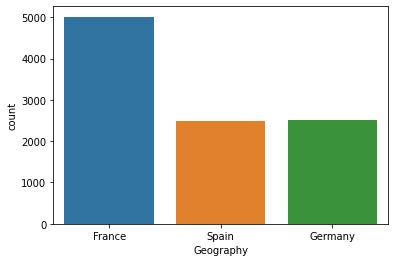

In [35]:
sns.countplot(x='Geography', data = df)

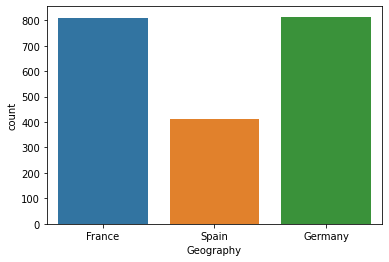

In [37]:
# How many people exited from which country?
sns.countplot(x='Geography', data = df[(df['Exited']==1)])

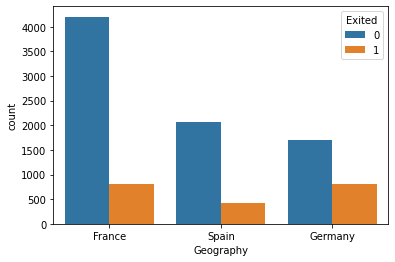

In [39]:
sns.countplot(x='Geography', hue='Exited', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


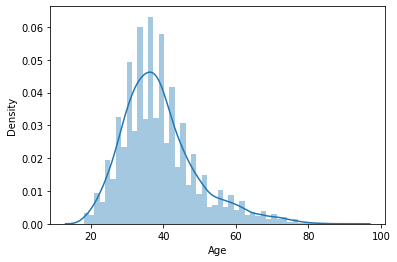

In [40]:
sns.distplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


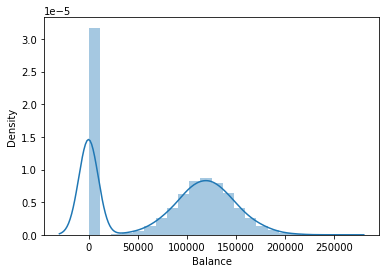

In [41]:
sns.distplot(df['Balance'])

In [42]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


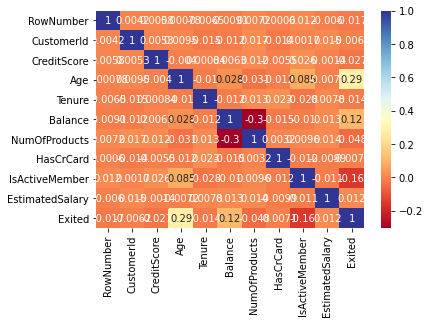

In [43]:
sns.heatmap(df.corr(), annot = True, cmap = "RdYlBu")

#Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
y

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

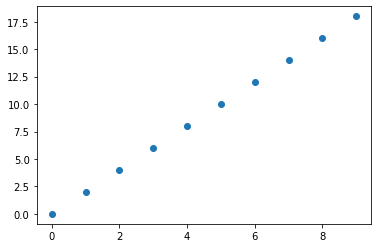

In [47]:
plt.scatter(x, y)

In [49]:
model = LinearRegression()

In [50]:
x_train = x.reshape(-1,1)

In [51]:
x_train

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [52]:
y_train = y

In [ ]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)